    ---
---

<center><h1>📍 📍 Assignment: Manufacturing Dataset 📍 📍</h1></center>
    
    
---

#### `READ THE Manufacturing Data - Perform EDA

---

In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

import warnings; warnings.simplefilter('ignore')


In [9]:
data_manufacturing = pd.read_csv('dataset/Manufacturing Dataset.csv')

In [10]:
data_manufacturing.head()

,Production ID,Date,Product Type,Machine ID,Shift,Units Produced,Defects,Production Time Hours,Material Cost Per Unit,Labour Cost Per Hour,Energy Consumption kWh,Operator Count,Maintenance Hours,Down time Hours,Production Volume Cubic Meters,Scrap Rate,Rework Hours,Quality Checks Failed,Average Temperature C,Average Humidity Percent
0,1899-12-31,2020-01-01,Automotive,3,Swing,142,3.0,23.42,38.68,15.38,413.97,1,4.86,1.57,2.34,0.048,1.65,1,22.8,47.2
1,1900-01-01,2020-01-02,Textiles,8,Night,170,4.0,7.51,21.35,25.36,181.16,2,2.51,0.18,1.52,0.030,NaN,1,23.8,37.9
2,1900-01-02,2020-01-03,Appliances,11,Swing,182,4.0,20.58,47.54,16.46,452.15,2,0.34,2.88,0.57,0.026,0.26,0,24.5,56.1
3,1900-01-03,2020-01-04,Appliances,11,Day,133,NaN,21.68,40.21,28.70,485.78,3,4.64,2.23,1.90,0.036,NaN,2,22.3,50.8
4,1900-01-04,2020-01-05,Electronics,14,Night,82,NaN,16.68,38.02,17.20,315.58,1,2.29,0.02,2.25,0.020,0.67,0,23.4,53.9


In [8]:
#1. Dealing with IQR using outlier

In [11]:
# Calculate Q1, Q3, and IQR for each column
Q1 = data_manufacturing.quantile(0.25)
Q3 = data_manufacturing.quantile(0.75)
IQR = Q3 - Q1

1. Dealing with IQR using outlier

- Calculate the Interquartile Range (IQR) for all the numerical columns and use the IQR to identify any potential outliers in these data points.

In [13]:
# Identify outliers
outliers = (data_manufacturing < (Q1 - 1.5 * IQR)) | (data_manufacturing > (Q3 + 1.5 * IQR))

In [14]:
# Handle outliers (e.g., replace with NaN or remove)
data_manufacturing_cleaned = data_manufacturing[~outliers.any(axis=1)]

In [15]:
# Save cleaned data to a new CSV file
#data_manufacturing_cleaned.to_csv('manufacturing_data_cleaned.csv', index=False)

2. Identify Missing Values Across Key Production Metrics:

Analyse the dataset to identify missing values across all the columns and calculate the total number of missing values for each of these columns. Describe your findings and then impute all the missing values with suitable data points.

In [16]:
# Identify missing values and calculate the total number of missing values for each column
missing_values = data_manufacturing_cleaned.isnull().sum()

In [17]:
# Display the total number of missing values for each column
print("Total number of missing values for each column:")
print(missing_values)

Total number of missing values for each column:
Production ID                       0
Date                                0
Product Type                        0
Machine ID                          0
Shift                               0
Units Produced                      0
Defects                           299
Production Time Hours               0
Material Cost Per Unit              0
Labour Cost Per Hour                0
Energy Consumption kWh              0
Operator Count                      0
Maintenance Hours                 298
Down time Hours                   298
Production Volume Cubic Meters      0
Scrap Rate                          0
Rework Hours                      298
Quality Checks Failed               0
Average Temperature C               0
Average Humidity Percent            0
dtype: int64


In [18]:
data_manufacturing_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2982 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Production ID                   2982 non-null   object 
 1   Date                            2982 non-null   object 
 2   Product Type                    2982 non-null   object 
 3   Machine ID                      2982 non-null   int64  
 4   Shift                           2982 non-null   object 
 5   Units Produced                  2982 non-null   int64  
 6   Defects                         2683 non-null   float64
 7   Production Time Hours           2982 non-null   float64
 8   Material Cost Per Unit          2982 non-null   float64
 9   Labour Cost Per Hour            2982 non-null   float64
 10  Energy Consumption kWh          2982 non-null   float64
 11  Operator Count                  2982 non-null   int64  
 12  Maintenance Hours               26

In [19]:
# Describe your findings
print("\nFindings:")
print("The dataset contains missing values across 4 columns.")
print("The number of missing values varies for each of these columns, indicating data quality issues.")


Findings:
The dataset contains missing values across 4 columns.
The number of missing values varies for each of these columns, indicating data quality issues.


In [20]:
# Impute missing values with the mean of each column
data_manufacturing_cleaned_imputed = data_manufacturing_cleaned.fillna(data_manufacturing_cleaned.mean())

In [21]:
data_manufacturing_cleaned_imputed.head()

,Production ID,Date,Product Type,Machine ID,Shift,Units Produced,Defects,Production Time Hours,Material Cost Per Unit,Labour Cost Per Hour,Energy Consumption kWh,Operator Count,Maintenance Hours,Down time Hours,Production Volume Cubic Meters,Scrap Rate,Rework Hours,Quality Checks Failed,Average Temperature C,Average Humidity Percent
0,1899-12-31,2020-01-01,Automotive,3,Swing,142,3.000000,23.42,38.68,15.38,413.97,1,4.86,1.57,2.34,0.048,1.650000,1,22.8,47.2
1,1900-01-01,2020-01-02,Textiles,8,Night,170,4.000000,7.51,21.35,25.36,181.16,2,2.51,0.18,1.52,0.030,1.003744,1,23.8,37.9
2,1900-01-02,2020-01-03,Appliances,11,Swing,182,4.000000,20.58,47.54,16.46,452.15,2,0.34,2.88,0.57,0.026,0.260000,0,24.5,56.1
3,1900-01-03,2020-01-04,Appliances,11,Day,133,4.539694,21.68,40.21,28.70,485.78,3,4.64,2.23,1.90,0.036,1.003744,2,22.3,50.8
4,1900-01-04,2020-01-05,Electronics,14,Night,82,4.539694,16.68,38.02,17.20,315.58,1,2.29,0.02,2.25,0.020,0.670000,0,23.4,53.9


#3. Relationship Between Costs:

#- Is there a pattern between the cost of materials per unit and the hourly labor cost? Determine if higher costs in materials tend to coincide with higher labor costs.

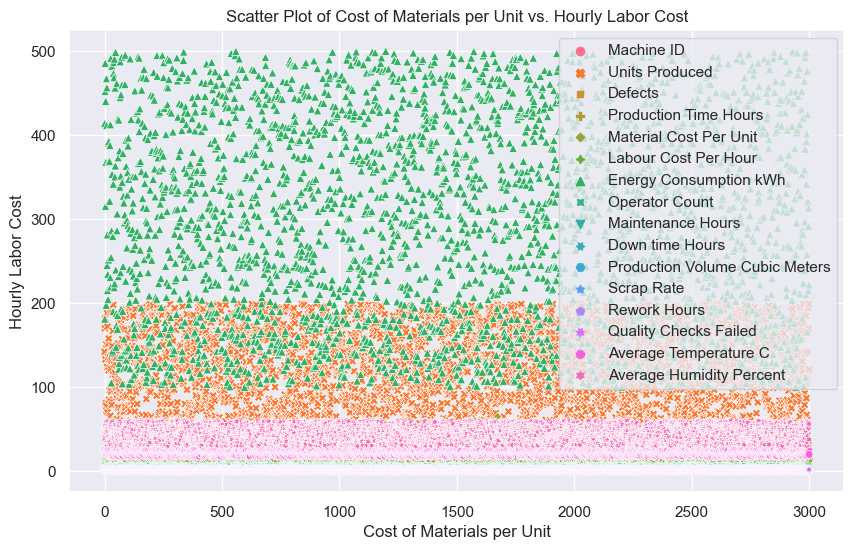

In [29]:
# Scatter plot of cost of materials per unit vs. hourly labor cost
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_manufacturing_cleaned_imputed)
#sns.scatterplot(x='Cost_of_Materials_per_Unit', y='Hourly_Labor_Cost', data=data_manufacturing_cleaned_imputed)
plt.title('Scatter Plot of Cost of Materials per Unit vs. Hourly Labor Cost')
plt.xlabel('Cost of Materials per Unit')
plt.ylabel('Hourly Labor Cost')
plt.grid(True)
plt.show()

In [34]:
# Calculate correlation coefficient
correlation_coefficient = data_manufacturing_cleaned_imputed['Material Cost Per Unit'].corr(data_manufacturing_cleaned_imputed['Labour Cost Per Hour'])
print("Correlation Coefficient:", correlation_coefficient)

# Perform hypothesis testing (linear regression)
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(data_manufacturing_cleaned_imputed['Material Cost Per Unit'], data_manufacturing_cleaned_imputed['Labour Cost Per Hour'])
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value ** 2)
print("P-value:", p_value)

Correlation Coefficient: -6.329498278508154e-05
Slope: -2.3721579528187804e-05
Intercept: 22.648231336033525
R-squared: 4.006254845763769e-09
P-value: 0.9972433591857479


4. Efficiency Across Shifts:

- Do different work shifts (Day, Swing, Night) show differences in how long products take to make or how much energy they use? Compare these shifts to see if one is more efficient or uses less energy.

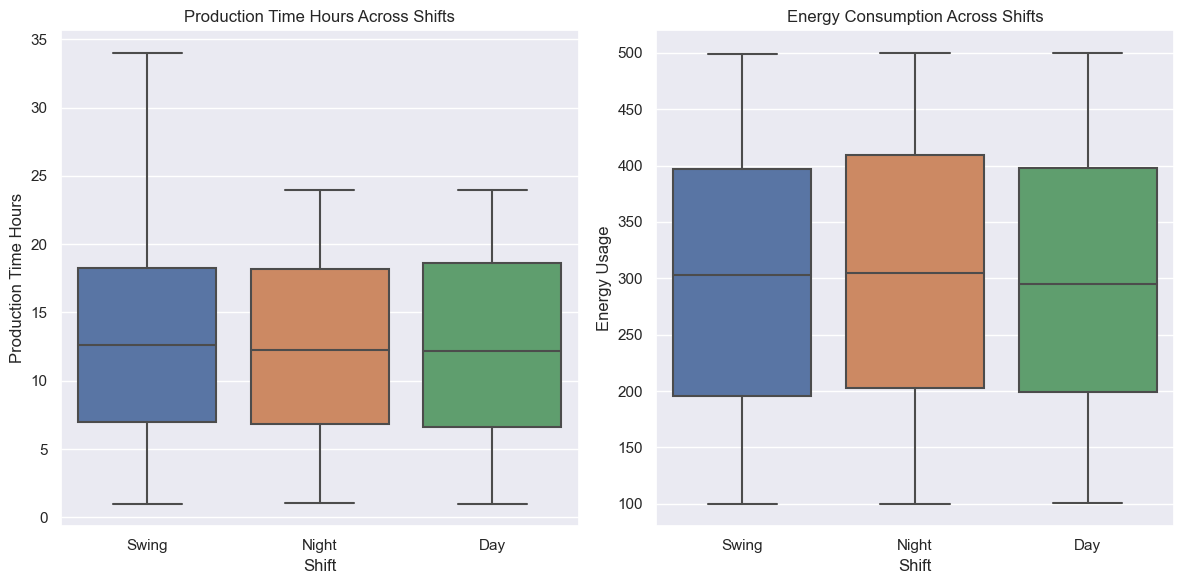

ANOVA for Production Time Hours:
F-statistic: 0.05326159238799553
P-value: 0.9481328587880442

ANOVA for Energy Usage:
F-statistic: 0.4845113808872685
P-value: 0.6160466449879762


In [37]:
# EDA: Visualize distribution of manufacturing duration and energy usage for each shift
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Shift', y='Production Time Hours', data=data_manufacturing_cleaned_imputed)
plt.title('Production Time Hours Across Shifts')
plt.xlabel('Shift')
plt.ylabel('Production Time Hours')

plt.subplot(1, 2, 2)
sns.boxplot(x='Shift', y='Energy Consumption kWh', data=data_manufacturing_cleaned_imputed)
plt.title('Energy Consumption Across Shifts')
plt.xlabel('Shift')
plt.ylabel('Energy Usage')

plt.tight_layout()
plt.show()

# Statistical Analysis: Compare manufacturing duration and energy usage across shifts
from scipy.stats import f_oneway

# Perform ANOVA for manufacturing duration
f_statistic_duration, p_value_duration = f_oneway(
    data_manufacturing_cleaned_imputed.loc[data_manufacturing_cleaned_imputed['Shift'] == 'Day', 'Production Time Hours'],
    data_manufacturing_cleaned_imputed.loc[data_manufacturing_cleaned_imputed['Shift'] == 'Swing', 'Production Time Hours'],
    data_manufacturing_cleaned_imputed.loc[data_manufacturing_cleaned_imputed['Shift'] == 'Night', 'Production Time Hours']
)
print("ANOVA for Production Time Hours:")
print("F-statistic:", f_statistic_duration)
print("P-value:", p_value_duration)

# Perform ANOVA for energy usage
f_statistic_energy, p_value_energy = f_oneway(
    data_manufacturing_cleaned_imputed.loc[data_manufacturing_cleaned_imputed['Shift'] == 'Day', 'Energy Consumption kWh'],
    data_manufacturing_cleaned_imputed.loc[data_manufacturing_cleaned_imputed['Shift'] == 'Swing', 'Energy Consumption kWh'],
    data_manufacturing_cleaned_imputed.loc[data_manufacturing_cleaned_imputed['Shift'] == 'Night', 'Energy Consumption kWh']
)
print("\nANOVA for Energy Usage:")
print("F-statistic:", f_statistic_energy)
print("P-value:", p_value_energy)

5. Monthly Production Trends:

- How does the average number of units produced change from month to month? Look for any patterns, such as times of the year when production increases or decreases significantly.

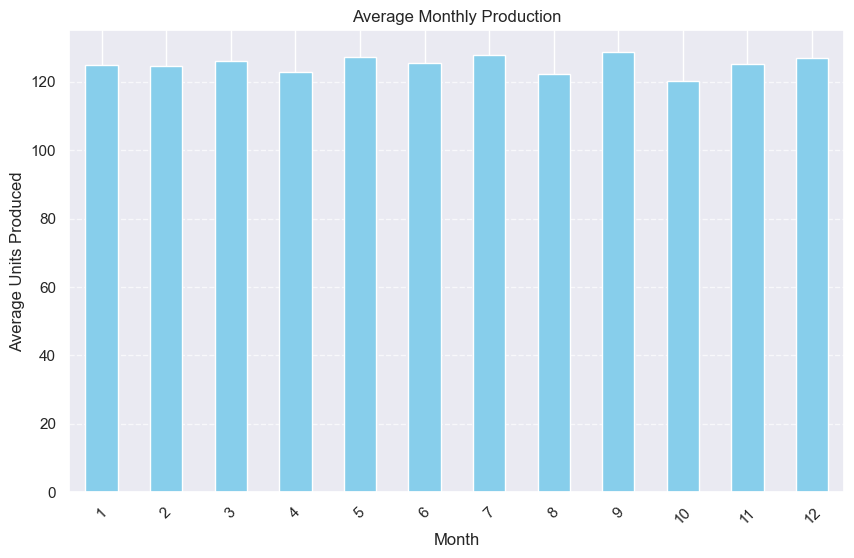

In [38]:
# Convert the 'Date' column to datetime format
data_manufacturing_cleaned_imputed['Date'] = pd.to_datetime(data_manufacturing_cleaned_imputed['Date'])

# Extract month from the date column
data_manufacturing_cleaned_imputed['Month'] = data_manufacturing_cleaned_imputed['Date'].dt.month

# Group data by month and calculate the average number of units produced for each month
monthly_production = data_manufacturing_cleaned_imputed.groupby('Month')['Units Produced'].mean()

# Visualize monthly production trends
plt.figure(figsize=(10, 6))
monthly_production.plot(kind='bar', color='skyblue')
plt.title('Average Monthly Production')
plt.xlabel('Month')
plt.ylabel('Average Units Produced')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

6. Variability in Production by Product Type:

- Which type of product shows the most variation in how much is produced? Measure this using standard deviation to find out which product type's production volume varies the most.

In [41]:
# Calculate the standard deviation of production volume for each product type
production_std_by_product_type = data_manufacturing_cleaned_imputed.groupby('Product Type')['Units Produced'].std()

# Find the product type with the highest standard deviation
most_variable_product_type = production_std_by_product_type.idxmax()
highest_std = production_std_by_product_type.max()

print("Product type with the most variation in production volume:")
print("Product Type:", most_variable_product_type)
print("Standard Deviation:", highest_std)

Product type with the most variation in production volume:
Product Type: Appliances
Standard Deviation: 43.99050559155318


7. The Role of Operator Count in Efficiency:

- How does the number of operators affect how many units are produced per hour? Check if having more operators leads to more efficient production.

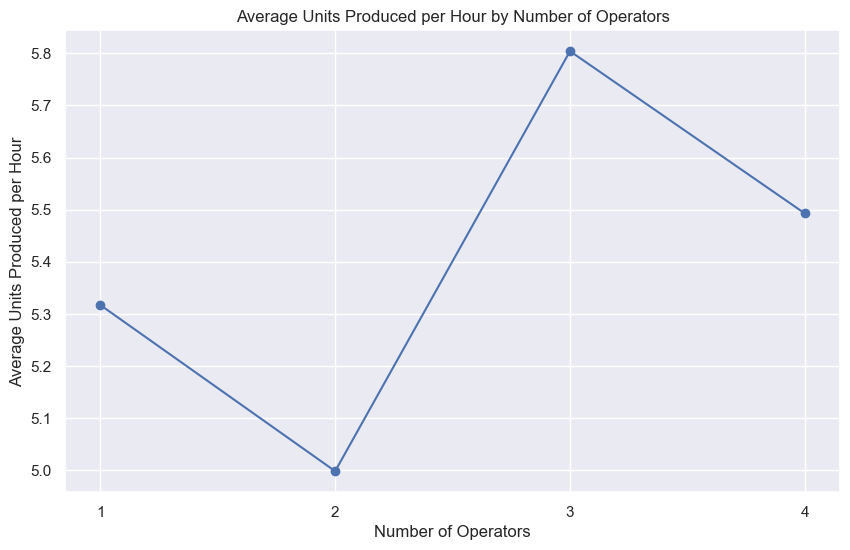

In [43]:
# Calculate units produced per hour
data_manufacturing_cleaned_imputed['Units Produced'] = data_manufacturing_cleaned_imputed['Units Produced'] / data_manufacturing_cleaned_imputed['Production Time Hours']

# Group data by number of operators and calculate average units produced per hour
avg_units_per_hour_by_operators = data_manufacturing_cleaned_imputed.groupby('Operator Count')['Units Produced'].mean()

# Visualize relationship between number of operators and units produced per hour
plt.figure(figsize=(10, 6))
plt.plot(avg_units_per_hour_by_operators.index, avg_units_per_hour_by_operators.values, marker='o', linestyle='-')
plt.title('Average Units Produced per Hour by Number of Operators')
plt.xlabel('Number of Operators')
plt.ylabel('Average Units Produced per Hour')
plt.grid(True)
plt.xticks(avg_units_per_hour_by_operators.index)
plt.show()

8. Identifying the Machine with Most Defects:

- Which machine tends to produce the most defects, considering the total units it produces? Calculate the defect rate as defects per 100 units to make comparisons easier.

In [44]:
# Calculate defect rate (defects per 100 units) for each machine
data_manufacturing_cleaned_imputed['Defect_Rate'] = (data_manufacturing_cleaned_imputed['Defects'] / data_manufacturing_cleaned_imputed['Units Produced']) * 100

# Group data by machine and calculate average defect rate
avg_defect_rate_by_machine = data_manufacturing_cleaned_imputed.groupby('Machine ID')['Defect_Rate'].mean()

# Find the machine with the highest average defect rate
most_defective_machine = avg_defect_rate_by_machine.idxmax()
highest_defect_rate = avg_defect_rate_by_machine.max()

print("Machine with the most defects relative to units produced:")
print("Machine:", most_defective_machine)
print("Average Defect Rate (per 100 units):", highest_defect_rate)


Machine with the most defects relative to units produced:
Machine: 8
Average Defect Rate (per 100 units): 966.3288839250372


9. How Environment Affects Scrap Rate:

- Do changes in temperature and humidity affect how much scrap (waste) is produced? Analyze the data to see if there's a correlation between environmental conditions and scrap rate.

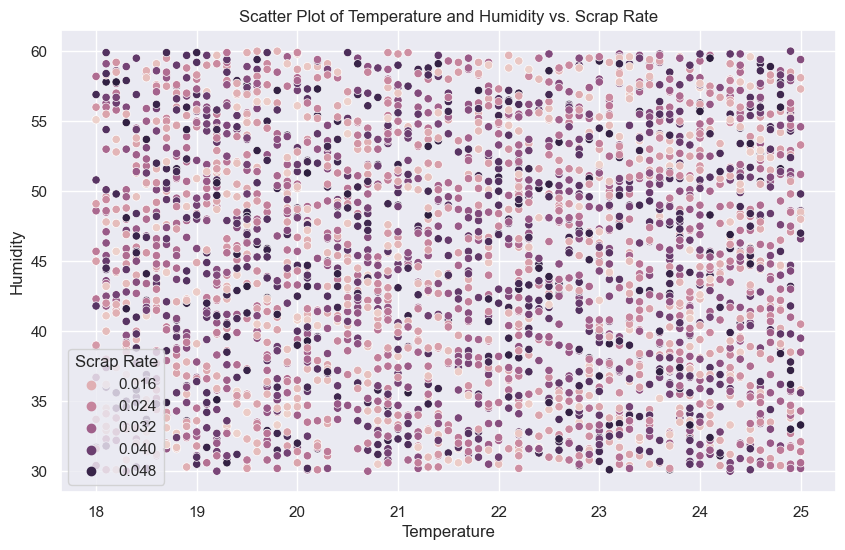

Correlation coefficient between temperature and scrap rate: 0.020063410714351596
Correlation coefficient between humidity and scrap rate: 0.028617865275653277


In [48]:
from scipy.stats import pearsonr
# Visualize the relationship between temperature, humidity, and scrap rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average Temperature C', y='Average Humidity Percent', hue='Scrap Rate', data=data_manufacturing_cleaned_imputed)
plt.title('Scatter Plot of Temperature and Humidity vs. Scrap Rate')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.legend(title='Scrap Rate')
plt.grid(True)
plt.show()

# Calculate correlation coefficients
correlation_temp_scrap, _ = pearsonr(data_manufacturing_cleaned_imputed['Average Temperature C'], data_manufacturing_cleaned_imputed['Scrap Rate'])
correlation_humidity_scrap, _ = pearsonr(data_manufacturing_cleaned_imputed['Average Humidity Percent'], data_manufacturing_cleaned_imputed['Scrap Rate'])

print("Correlation coefficient between temperature and scrap rate:", correlation_temp_scrap)
print("Correlation coefficient between humidity and scrap rate:", correlation_humidity_scrap)
